# Ingesting new unannotated data into existing annotated data

This is a demonstration of the `tl.ingest` function, which maps labels and embeddings from existing data to new data.

In [1]:
import scanpy as sc
from scanpy.tools._ingest import ingest

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
adata_ref = sc.datasets.pbmc68k_reduced()
adata_new = sc.datasets.pbmc3k_processed()

You have some data processed and annotated already.

In [ ]:
adata_new = adata_new[
    :, adata_new.var_names.intersection(adata_ref.var_names)].copy()

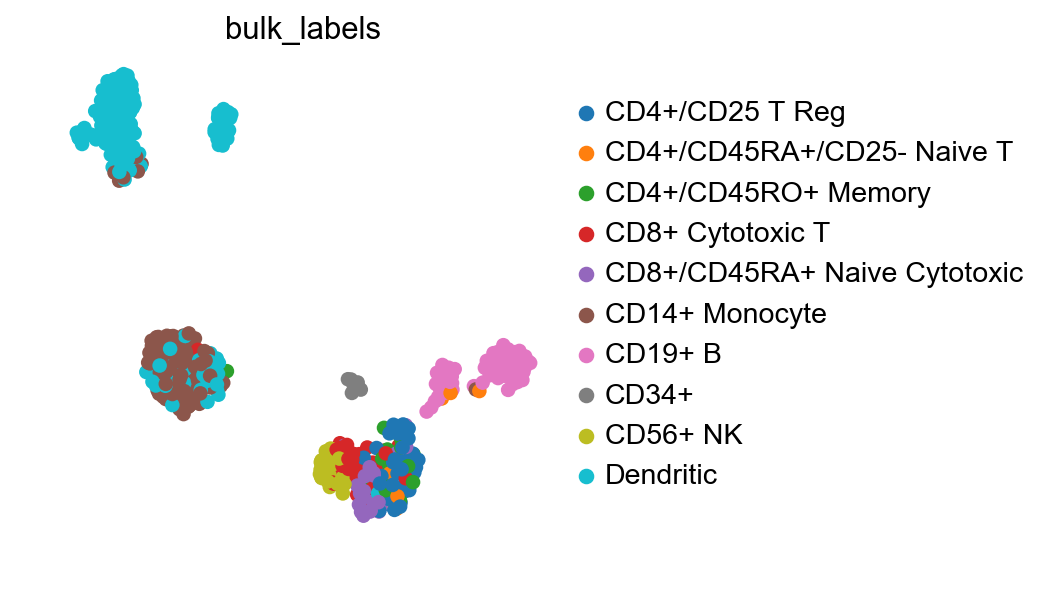

In [15]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='bulk_labels')

You have some new data, about which you don't know anything either. But note that it's preprocessed in a similar way to the reference data.

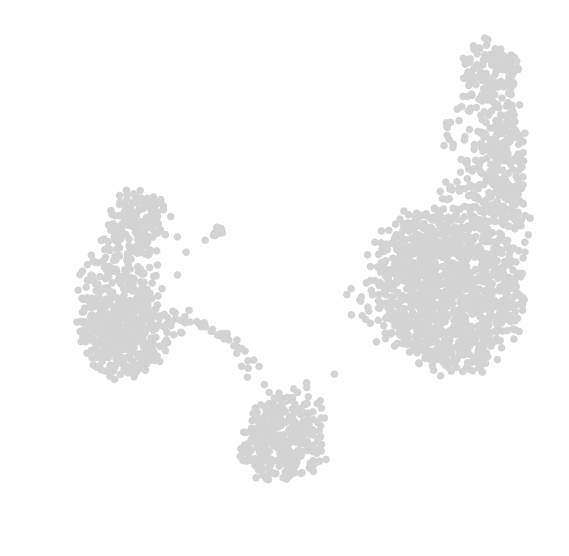

In [13]:
sc.pp.pca(adata_new)
sc.pp.neighbors(adata_new)
sc.tl.umap(adata_new)
sc.pl.umap(adata_new)

Let's map labels and embeddings from `adata_ref` to `adata_new`, based on a chosen representation; here, we use `adata_ref.obsm['X_pca']` to map cluster labels and the UMAP coordinates.

We call the function `ingest`, as we're ingesting `adata_new` into an existing annotated `adata_ref` to produce a joint dataset.

In [16]:
adata_joint = ingest(adata_new, adata_ref, obs='bulk_labels', return_joint=True)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1838 but corresponding boolean dimension is 765

... storing 'bulk_labels' as categorical
... storing 'louvain' as categorical
... storing 'phase' as categorical


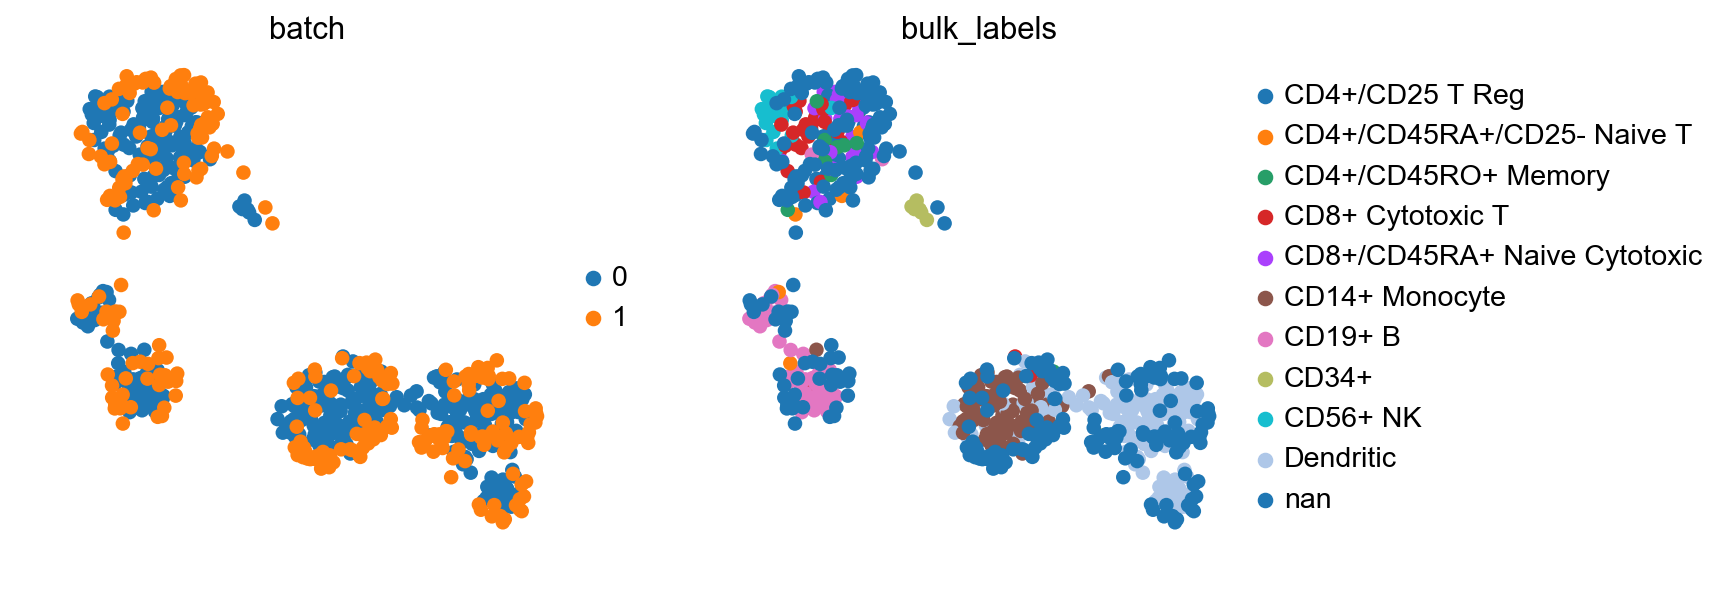

In [9]:
sc.pl.umap(
    adata_joint, color=['batch', 'bulk_labels'],
    palette=adata_ref.uns['bulk_labels_colors'])

<div class="alert alert-info">

**Note**

As the previous step does a fully copy of `adata_ref`, we might prefer to simply annotated adata_new with the mapped labels and coordinates, which is the default.

</div>

In [10]:
ingest(adata_new, adata_ref, obs='bulk_labels')

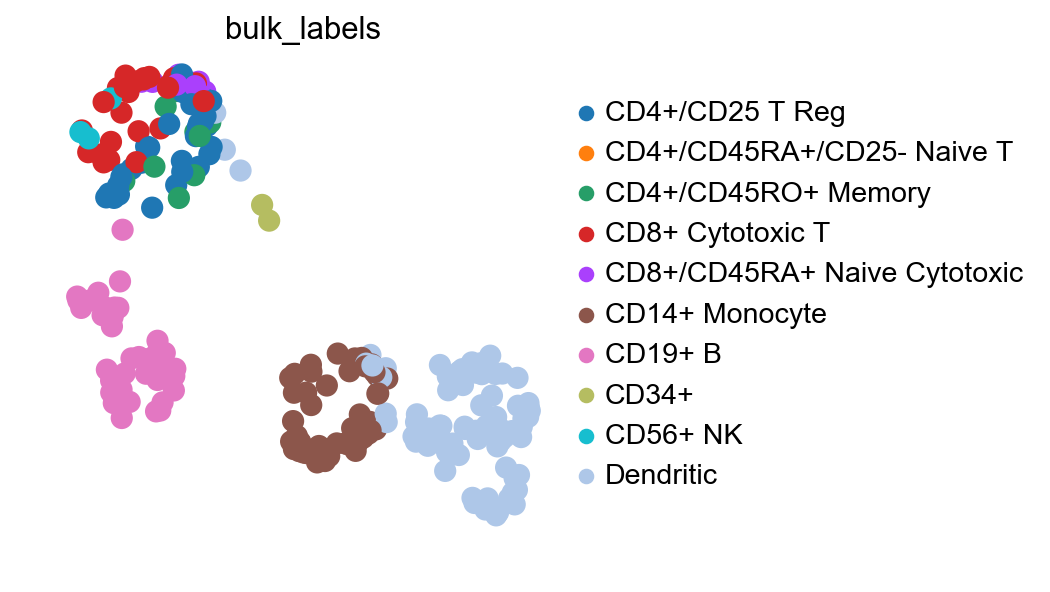

In [11]:
sc.pl.umap(
    adata_new, color='bulk_labels', palette=adata_ref.uns['bulk_labels_colors'])